# DL Final Project

In [77]:
from models.transunet import TransUnet
from data_processing.data_parser import DataReader
from experiments.config import get_transunet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [81]:
X = np.load("./sampleData/trainInputsSample224.npy")
y = np.load("./sampleData/trainOutputsSample224.npy")
# X_train = X[np.newaxis, :int(len(X)*.7), :, :, :].astype("float32")
# y_train = y[np.newaxis, :int(len(y)*.7), :, :, :].astype("float32")
# X_val = X[np.newaxis, int(len(X)*.7):, :, :, :].astype("float32")
# y_val = y[np.newaxis, int(len(y)*.7):, :, :, :].astype("float32")
X_train = X[:int(len(X)*.7), :, :, :].astype("float32")
y_train = y[:int(len(y)*.7), :, :, :].astype("float32")
X_val = X[int(len(X)*.7):, :, :, :].astype("float32")
y_val = y[int(len(y)*.7):, :, :, :].astype("float32")
X_test = np.load("./sampleData/testInputsSample224.npy")
y_test = np.load("./sampleData/testOutputsSample224.npy")

In [82]:
## Train Model
config = get_transunet()
# config.image_size = 512
# config.decoder_channels = [512, 256, 128, 64]
# config.n_skip = 6
config.image_size = 224
config.filters = 3
print(config.image_size)
transunet = TransUnet(config)
transunet.compile()
#history = transunet.train_validate(training_dataset, validation_dataset, save_path, epochs=150)

224


In [84]:
history = transunet.model.fit(x=X_train.astype("float32"), y=y_train.astype("float32"), validation_data=(X_val.astype("float32"), y_val.astype("float32")), epochs=5, batch_size=20, verbose=1)

Epoch 1/5
***************** (None, 224, 224, 3)
&&&&&&&&&&&&&&&&&& (None, 224, 224, 3)
***************** (None, 224, 224, 3)
&&&&&&&&&&&&&&&&&& (None, 224, 224, 3)
1/1 [==============================] - 320s 320s/step - loss: 132.6136 - val_loss: 314.0176
Epoch 2/5
1/1 [==============================] - 59s 59s/step - loss: 124.6055 - val_loss: 18344.5879
Epoch 3/5
1/1 [==============================] - 49s 49s/step - loss: 112.2743 - val_loss: 54795.3672
Epoch 4/5
1/1 [==============================] - 39s 39s/step - loss: 110.2560 - val_loss: 24393.9238
Epoch 5/5
1/1 [==============================] - 41s 41s/step - loss: 110.6535 - val_loss: 119511.8984


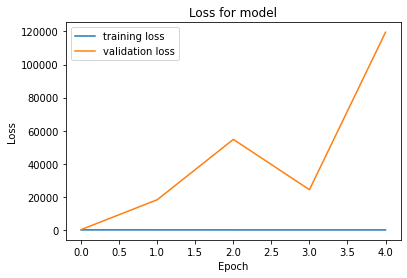

In [85]:
plt.figure()
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title(f"Loss for model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Code below uses train_validate(). Doe same thing as code above, but also computes dice coefficient automatically. Was not able to get it to work

In [73]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).repeat(10)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).repeat(10)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).repeat(10)

In [76]:
transunet.train_validate(training_dataset=train_dataset, validation_dataset=val_dataset, save_path="./", validation_samples=5, epochs=1, batch_size=100, show_history=True)

10/22 [============>.................] - ETA: 6:21 - loss: 4475686.5000

KeyboardInterrupt: 

(5, 224, 224, 3, 1)
